In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
import django
from flutype.utils import django_setup
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns


****************************************
RUNNING IN DEVELOP
****************************************


In [13]:
reload(pre)
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py'>

In [8]:
studies = ["microarray_2018_01_24", "microarray_2018_03_21","microarray_2018_02_18"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
cs = ["2018_03_21_slide_31","slide_41","slide_30","2018_03_21_slide_21","2018_03_21_slide69"]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)




In [9]:
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering()

mean_on_collection = pre.mean_on_collection(data.spots_pd)


In [14]:
mean_on_ana = pre.mean_on_analyte_batch(data.spots_pd)

No handles with labels found to put in legend.


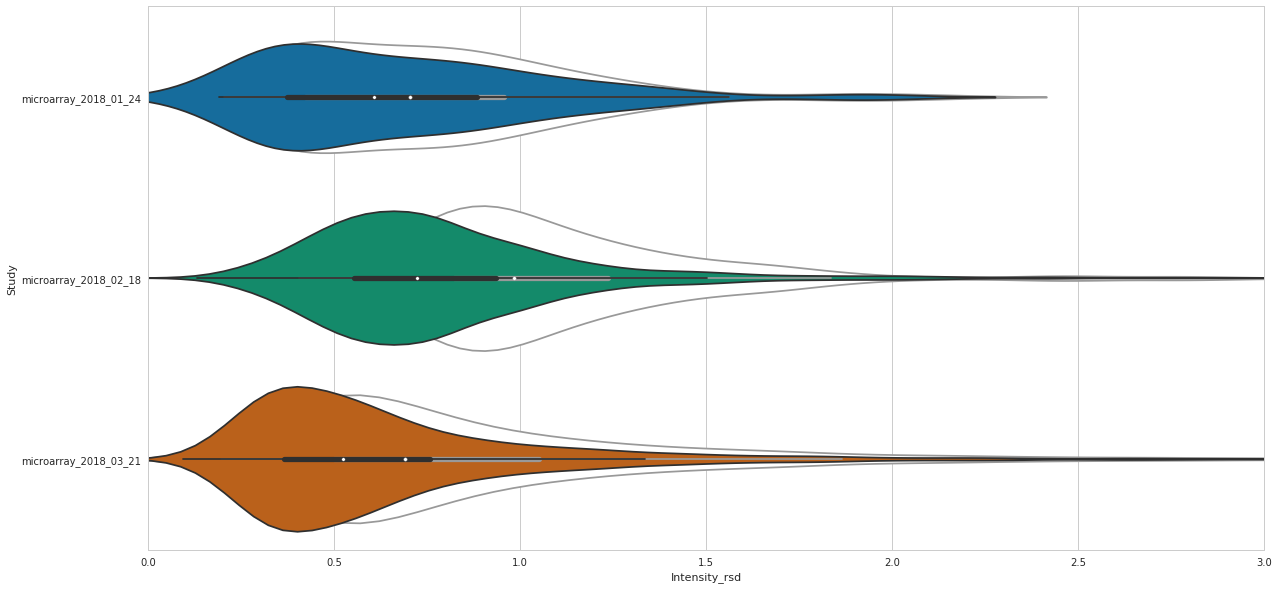

In [30]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )

fig , ax = plt.subplots(1,1,figsize=(20,10))
ax = sns.violinplot(y="Study", x="Intensity_rsd", whis=np.inf, data=mean_on_ana.sort_values(by="Study"), color="white" ,alpha=0.1,)

ax = sns.violinplot(y="Study", x="Intensity_rsd", whis=np.inf, data=mean_on_collection.sort_values(by="Study"), alpha=0.1, )
#ax.set_xscale("log")
ax.set_xlim(0,3)
ax.legend()
plt.show()

In [39]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
cs = ["2018_03_21_slide_31","slide_41","slide_30","2018_03_21_slide_21","2018_03_21_slide69"]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)

data = a2.Data(spots_dj=spots_dj)


In [40]:
mc_ana = data.mean_on_collection().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]
ma_ana = data.mean_on_analyte_batch().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]


In [42]:
dc= data.mean_on_collection()

In [47]:
rsd_diff = pd.DataFrame(mc_ana/ma_ana)
rsd_diff.loc["Mean"] =rsd_diff.mean()
rsd_diff.to_clipboard()

In [44]:
dc.head()

,Ligand Batch,Collection,Study,Analyte Batch,Ligand Batch Concentration,Analyte Batch Concentraion,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
0,Empty,2018_03_21_slide_30,microarray_2018_03_21,A/Perth/16/2009(H3N2)-2018-04-13,NaN,3.522222,496.059977,918.491162,0.397102,28.424242,8.424242,49.0,33.0,63.562902,1.333280e+05,0.736083
1,Empty,2018_03_21_slide_32,microarray_2018_03_21,A/Texas/50/2012(H3N2)-2018-04-13,NaN,1.064474,210.076824,304.488735,0.202020,28.424242,8.424242,16.0,33.0,33.201726,3.637770e+04,0.907903
2,Empty,2018_03_21_slide_33,microarray_2018_03_21,A/Texas/50/2012(H3N2)-2018-04-13,NaN,1.064474,1061.061085,1131.815537,0.244129,28.424242,8.424242,82.0,33.0,674.443540,1.501084e+07,3.651423
3,Empty,2018_03_21_slide_34,microarray_2018_03_21,A/Texas/50/2012(H3N2)-2018-04-13,NaN,1.064474,171.532935,307.885398,0.256913,28.424242,8.424242,49.0,33.0,19.755644,1.287942e+04,0.661608
4,Empty,2018_03_21_slide_35,microarray_2018_03_21,A/Switzerland/9715293/2013(H3N2)-2018-04-13,NaN,1.161818,109.313518,216.668945,0.236995,28.424242,8.424242,82.0,33.0,10.544949,3.669466e+03,0.554150


In [63]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj).outlier_filtering()


/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


In [64]:
mean_on_analyte_batch = pre.mean_on_analyte_batch(data.spots_pd)

In [65]:
mean_on_analyte_batch

,Ligand Batch,Analyte Batch,Ligand Batch Concentration,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
0,LF-0.0001,A/Brisbaine/59/2007(H1N1)-2018-04-13,0.0001,2894.283912,6809.464640,0.390625,26.000000,8.000000,0.000000,1.0,NaN,NaN,NaN
1,LF-0.0001,A/Hong Kong/4801/2014(H3N2)-2018-04-13,0.0001,47553.331230,18710.357268,0.390625,32.000000,11.000000,0.000000,1.0,NaN,NaN,NaN
2,LF-0.0001,A/Panama/2007/1999(H3N2)-2018-04-13,0.0001,1223.637224,6106.499414,0.312500,7.000000,14.000000,0.000000,1.0,NaN,NaN,NaN
3,LF-0.0001,A/Perth/16/2009(H3N2)-2018-04-13,0.0001,1431.814059,3586.152509,0.333333,38.000000,14.000000,0.000000,1.0,NaN,NaN,NaN
4,LF-0.0001,A/Victoria/361/2011(H3N2)-2018-04-13,0.0001,11207.798107,15775.949758,0.312500,32.000000,11.000000,0.000000,1.0,NaN,NaN,NaN
5,LF-0.0001,Mi45-2018-04-13,0.0001,1321.452259,3577.068441,0.322917,32.000000,11.000000,0.000000,2.0,1116.040494,2.491093e+06,1.194383
6,LF-0.001,A/Aichi/2/68(H3N2)-X31-2018-04-13,1.0000,7638.984227,12284.083761,0.312500,20.000000,4.000000,0.000000,1.0,NaN,NaN,NaN
7,LF-0.001,A/Perth/16/2009(H3N2)-2018-04-13,1.0000,2333.558344,2010.274281,0.583333,57.000000,7.000000,0.000000,1.0,NaN,NaN,NaN
8,LF-0.001,A/Switzerland/9715293/2013(H3N2)-2018-04-13,1.0000,4107.116719,9618.952261,0.328125,45.000000,1.000000,0.000000,1.0,NaN,NaN,NaN
9,LF-0.001,Mi45-2018-04-13,1.0000,202.277603,264.003355,0.312500,20.000000,4.000000,0.000000,1.0,NaN,NaN,NaN


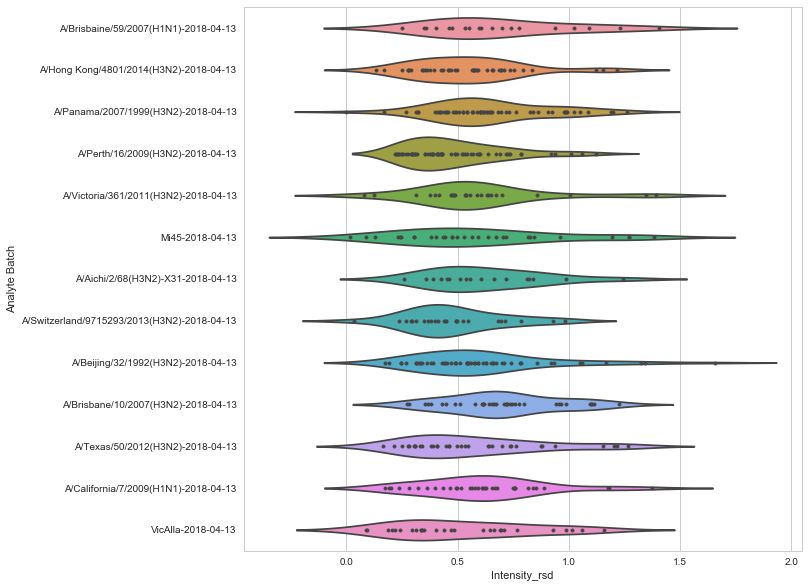

In [87]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(y="Analyte Batch", x="Intensity_rsd", whis=np.inf, data=mean_on_analyte_batch,inner="points" )
plt.show()

In [67]:
mean_on_collection = pre.mean_on_collection(data.spots_pd)

In [68]:
mean_on_analyte_batch

,Ligand Batch,Analyte Batch,Ligand Batch Concentration,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
0,LF-0.0001,A/Brisbaine/59/2007(H1N1)-2018-04-13,0.0001,2894.283912,6809.464640,0.390625,26.000000,8.000000,0.000000,1.0,NaN,NaN,NaN
1,LF-0.0001,A/Hong Kong/4801/2014(H3N2)-2018-04-13,0.0001,47553.331230,18710.357268,0.390625,32.000000,11.000000,0.000000,1.0,NaN,NaN,NaN
2,LF-0.0001,A/Panama/2007/1999(H3N2)-2018-04-13,0.0001,1223.637224,6106.499414,0.312500,7.000000,14.000000,0.000000,1.0,NaN,NaN,NaN
3,LF-0.0001,A/Perth/16/2009(H3N2)-2018-04-13,0.0001,1431.814059,3586.152509,0.333333,38.000000,14.000000,0.000000,1.0,NaN,NaN,NaN
4,LF-0.0001,A/Victoria/361/2011(H3N2)-2018-04-13,0.0001,11207.798107,15775.949758,0.312500,32.000000,11.000000,0.000000,1.0,NaN,NaN,NaN
5,LF-0.0001,Mi45-2018-04-13,0.0001,1321.452259,3577.068441,0.322917,32.000000,11.000000,0.000000,2.0,1116.040494,2.491093e+06,1.194383
6,LF-0.001,A/Aichi/2/68(H3N2)-X31-2018-04-13,1.0000,7638.984227,12284.083761,0.312500,20.000000,4.000000,0.000000,1.0,NaN,NaN,NaN
7,LF-0.001,A/Perth/16/2009(H3N2)-2018-04-13,1.0000,2333.558344,2010.274281,0.583333,57.000000,7.000000,0.000000,1.0,NaN,NaN,NaN
8,LF-0.001,A/Switzerland/9715293/2013(H3N2)-2018-04-13,1.0000,4107.116719,9618.952261,0.328125,45.000000,1.000000,0.000000,1.0,NaN,NaN,NaN
9,LF-0.001,Mi45-2018-04-13,1.0000,202.277603,264.003355,0.312500,20.000000,4.000000,0.000000,1.0,NaN,NaN,NaN


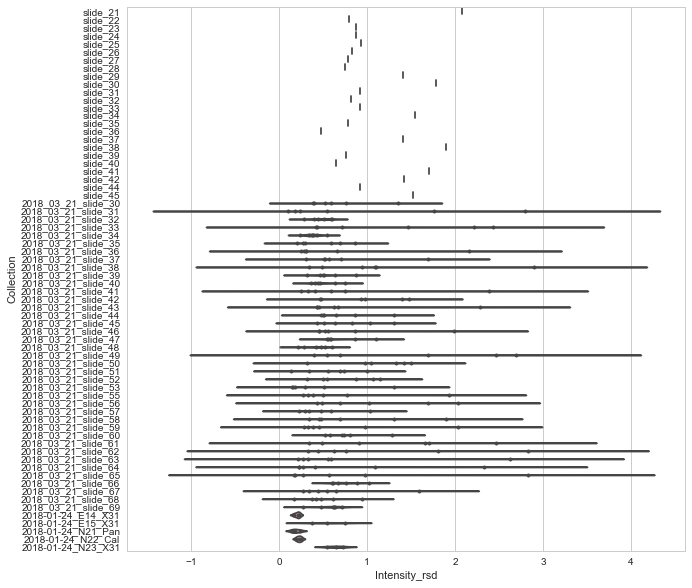

In [88]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(y="Collection", x="Intensity_rsd", whis=np.inf, data=mean_on_collection,inner="points" )
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=5,nrows=2, figsize = (35,14))

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.YlGnBu
for name, d in peptide_c_signif.groupby("Viruses"):
    x = y = np.linspace(peptide_c_signif.v1_i.min(),peptide_c_signif.v1_i.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.35
    #d_selected = d[d["Significance"] > boundary]
    #d_n = d[d["Significance"] < boundary]
    
    
    d_n = d
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    d_selected = d.loc[d["Peptide"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Peptide"],(dp.v1_i+0.01,dp.v2_i+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()  

In [5]:

spots_dj = Spot.objects.all()
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")

  
spots_dj = spots_dj.filter(circle_quality__gte = 0.2)
data = a2.Data(spots_dj=spots_dj)


In [6]:
mean_on_collection = pre.mean_on_collection(data.spots_pd)

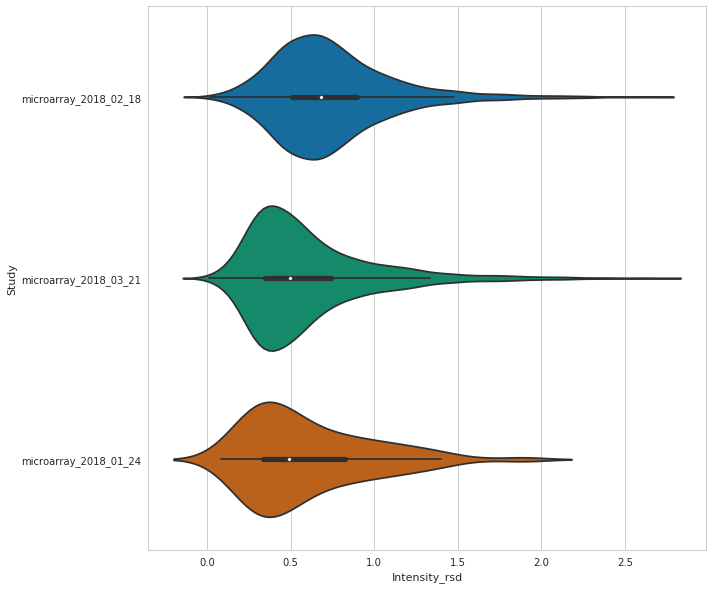

In [7]:
studies = ["microarray_2018_03_21"]

sns.set(style="whitegrid", palette="colorblind", color_codes=True )

fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(y="Study", x="Intensity_rsd", whis=np.inf, data=mean_on_collection )
plt.show()

In [8]:
studies = ["microarray_2018_03_21"]

spots_dj = Spot.objects.all()
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.2)
data = a2.Data(spots_dj=spots_dj)
data_lf = data.subset_ligand(["LF"])



In [9]:

data_lf.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),222.365482,462.397952,0.854167,2018_03_21_slide_37,microarray_2018_03_21,1.0,1.0,quant1,0.0
1,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),241.446701,772.256791,0.458333,2018_03_21_slide_37,microarray_2018_03_21,1.0,2.0,quant1,1.0
2,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),160.766497,236.465398,0.458333,2018_03_21_slide_37,microarray_2018_03_21,1.0,3.0,quant1,2.0
3,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),144.609137,195.361761,0.541667,2018_03_21_slide_37,microarray_2018_03_21,1.0,4.0,quant1,3.0
4,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),271.223350,387.183269,0.708333,2018_03_21_slide_37,microarray_2018_03_21,1.0,5.0,quant1,4.0
5,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),277.076142,233.269760,0.875000,2018_03_21_slide_37,microarray_2018_03_21,1.0,6.0,quant1,5.0
6,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),198.588832,217.918111,0.604167,2018_03_21_slide_37,microarray_2018_03_21,1.0,7.0,quant1,6.0
7,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),158.167513,243.086764,0.979167,2018_03_21_slide_37,microarray_2018_03_21,1.0,8.0,quant1,7.0
8,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),221.497462,210.093081,0.750000,2018_03_21_slide_37,microarray_2018_03_21,1.0,9.0,quant1,8.0
9,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),195.817259,194.734173,0.687500,2018_03_21_slide_37,microarray_2018_03_21,1.0,10.0,quant1,9.0


In [10]:
mean_on_collection = pre.mean_on_collection(data_lf.spots_pd)

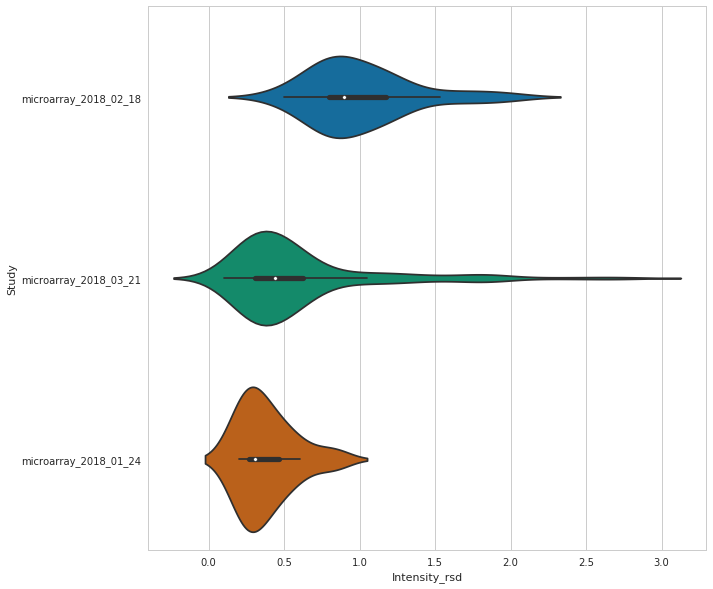

In [11]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(y="Study", x="Intensity_rsd", whis=np.inf, data=mean_on_collection )
plt.show()

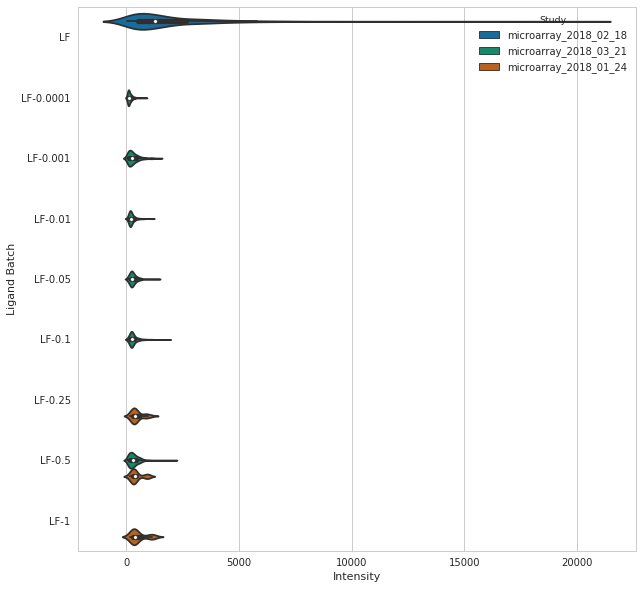

In [12]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(y="Ligand Batch", x="Intensity",hue="Study", data=data_lf.outlier_filtering().spots_pd )
plt.show()

In [98]:
lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

In [100]:
all_sig = data.ligand_batch_significance()


In [101]:
all_sig

,Ligand Batch,Analyte Batches,Significance,V1_I,V2_I,V1_Err,V2_Err,V1_Count,V2_Count
0,Nenad,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",7.21935e-18,27739.6,4089.63,4085.66,962.467,34,7
3,P059,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",4.06228e-10,25585.9,33083,4166.68,3241.99,31,27
4,P131.2,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",1.03973e-07,10660.3,2510.16,2664.1,1043.55,22,6
5,P080,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",1.20069e-23,28506.7,11747.9,3584.36,2140.91,34,18
6,P120,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",0.00787147,6102.27,1614.21,2685.73,495.94,9,4
7,P055,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",2.40708e-24,27798.1,12610.5,4041.97,1833.72,31,26
9,P095,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",3.87227e-16,20556.2,30287.8,3857.67,2485.77,32,27
11,P075,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",0.0465359,2875.31,866.298,1715.32,553.867,9,4
12,P009,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",2.43416e-06,3948.97,1058.19,1028.02,650.408,17,6
14,P043,"(A/Aichi/2/68(H3N2)-X31-2017-05-02, A/Aichi/2/...",2.29619e-08,12381.7,3620.92,3336.92,811.111,27,8


In [103]:
lb[::-1]

Ligand Batch
P049-0.5        4.271089e-08
P014-1          3.921827e-07
P050-1          1.414750e-06
P052-0.5        1.469952e-06
P052-1          1.560960e-06
LF              1.643332e-05
P011-0.5        7.555018e-05
P010-0.5        2.323995e-04
P049-1          6.334361e-04
P050-0.5        9.899046e-04
P014-0.5        1.221173e-03
P011-1          1.847789e-03
P001-1          1.995969e-03
P061-0.5        1.982494e-02
P010-0.25       2.812515e-02
P061-1          5.445339e-02
P012-1          8.078051e-02
AK_Cal_28666    9.577235e-02
P099            1.060234e-01
P061-0.25       1.282193e-01
P030            1.726412e-01
P054            1.844258e-01
P011-0.25       1.987329e-01
P052            1.988358e-01
P050-0.25       2.606456e-01
P077            3.850556e-01
P007            4.396629e-01
LF-0.05         4.577576e-01
P043            4.680963e-01
P086            5.084287e-01
                    ...     
P075            9.423154e-01
P098            9.448470e-01
P122            9.454958e-01
P